In [1]:
#import training data
import pandas as pd
training_data = pd.read_csv('train.csv')
display(training_data.head())
print('Training data shape: ', training_data.shape)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Training data shape:  (1458644, 11)


In [2]:
#data exploration
display(training_data.dtypes)

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [3]:
import numpy as np
print(training_data.store_and_fwd_flag.unique())
training_data['store_and_fwd_flag'] = np.where(training_data['store_and_fwd_flag'].str.match('Y'),1,0)
display(training_data.head())

['N' 'Y']


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435


In [4]:
print(training_data.store_and_fwd_flag.unique())

[0 1]


In [5]:
#define performance metric
import math
def rmsle_score(y_true, y_pred):
    a = [math.log(val+1) for val in y_true if val >= 0]
    p = [math.log(val+1) for val in y_pred if val >= 0]
    squared_error = [math.pow(p_val-a_val,2) for p_val, a_val in zip(p, a)]
    mean_squared_error = np.mean(squared_error)
    return math.sqrt(mean_squared_error)

#unit tests
print(rmsle_score([1,1], [0,0]))
print(rmsle_score([1,1], [1,1]))
print(rmsle_score([2,2], [0,0]))
print(rmsle_score([-2,2], [0,0]))

0.6931471805599453
0.0
1.0986122886681098
1.0986122886681098


In [6]:
#define another performance metric
from sklearn.metrics import r2_score
def r2_performance_metric(y_true, y_predict):
    '''This function defines the performce metric based on the r2 score'''
    return r2_score(y_true, y_predict, multioutput = None)

In [7]:
# Calculate accuracy for a given regressor
def modelandtest(regressor, X_train, X_test, y_train, y_test):
    regressor.fit(X_train, y_train)
    y_predict = regressor.predict(X_test)
    print('r2_score: ', r2_performance_metric(y_test, y_predict))
    print('rmsle_score: ', rmsle_score(y_test, y_predict))

In [8]:
#separate data into features and labels
trip_time = training_data['trip_duration']
display(trip_time.head())
trip_id = training_data['id']
#drop trip_duration and id
training_data.drop(['id','trip_duration'], axis=1, inplace=True)
display(training_data.head())

0     455
1     663
2    2124
3     429
4     435
Name: trip_duration, dtype: int64

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0


In [9]:
#convert pickup date time and drop off date time to float and taking log of time
import time
time_format = '%Y-%m-%d %H:%M:%S'
training_data['pickup_datetime'] = [math.log(time.mktime(time.strptime(d,time_format))) 
                                    for d in training_data['pickup_datetime']]
training_data['dropoff_datetime'] = [math.log(time.mktime(time.strptime(d,time_format))) 
                                     for d in training_data['dropoff_datetime']]
display(training_data.head())

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,2,21.100283,21.100283,1,-73.982155,40.767937,-73.964630,40.765602,0
1,1,21.105564,21.105564,1,-73.980415,40.738564,-73.999481,40.731152,0
2,2,21.097004,21.097005,1,-73.979027,40.763939,-74.005333,40.710087,0
3,2,21.101653,21.101653,1,-74.010040,40.719971,-74.012268,40.706718,0
4,2,21.100984,21.100985,1,-73.973053,40.793209,-73.972923,40.782520,0


In [10]:
#from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(training_data, trip_time, test_size=0.2, random_state=0)

In [11]:
#define model and use grid serach cv
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import ShuffleSplit
from sklearn.preprocessing import Imputer

def fit_model(X, y, regressor):
    '''This function returns the best parameters for diffrent regression functions'''
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    params = dict(max_depth=range(1,50), min_samples_split=range(2,200,10), min_samples_leaf=range(2,200,10), 
                  max_leaf_nodes=range(2,200,10),)
    scoring_fnc = make_scorer(r2_score)
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)
    grid = grid.fit(X, y)
    print('Best Estimator is ', grid.best_estimator_)
    return grid.best_estimator_

c:\users\shindeh3\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
#grid search cv runs for a long time!
#from sklearn.tree import DecisionTreeRegressor
#decision_tree_regressor = DecisionTreeRegressor(random_state=0)
#reg = fit_model(X_train, y_train, decision_tree_regressor)
#print('max depth is ', reg.get_params())

In [13]:
#Regressor 2 - Adaboost Regressor - took too long
#from sklearn.ensemble import AdaBoostRegressor
#adaboost_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=33, random_state=0))
#print('Score for AdaBoostRegressor: ', modelandtest(adaboost_regressor, X_train, X_test, y_train, y_test))

In [14]:
#PCA analysis
#plot pca results
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
%matplotlib inline

def pca_results(good_data, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''
    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (28,16))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

shape of reduced data:  (1458644, 6)


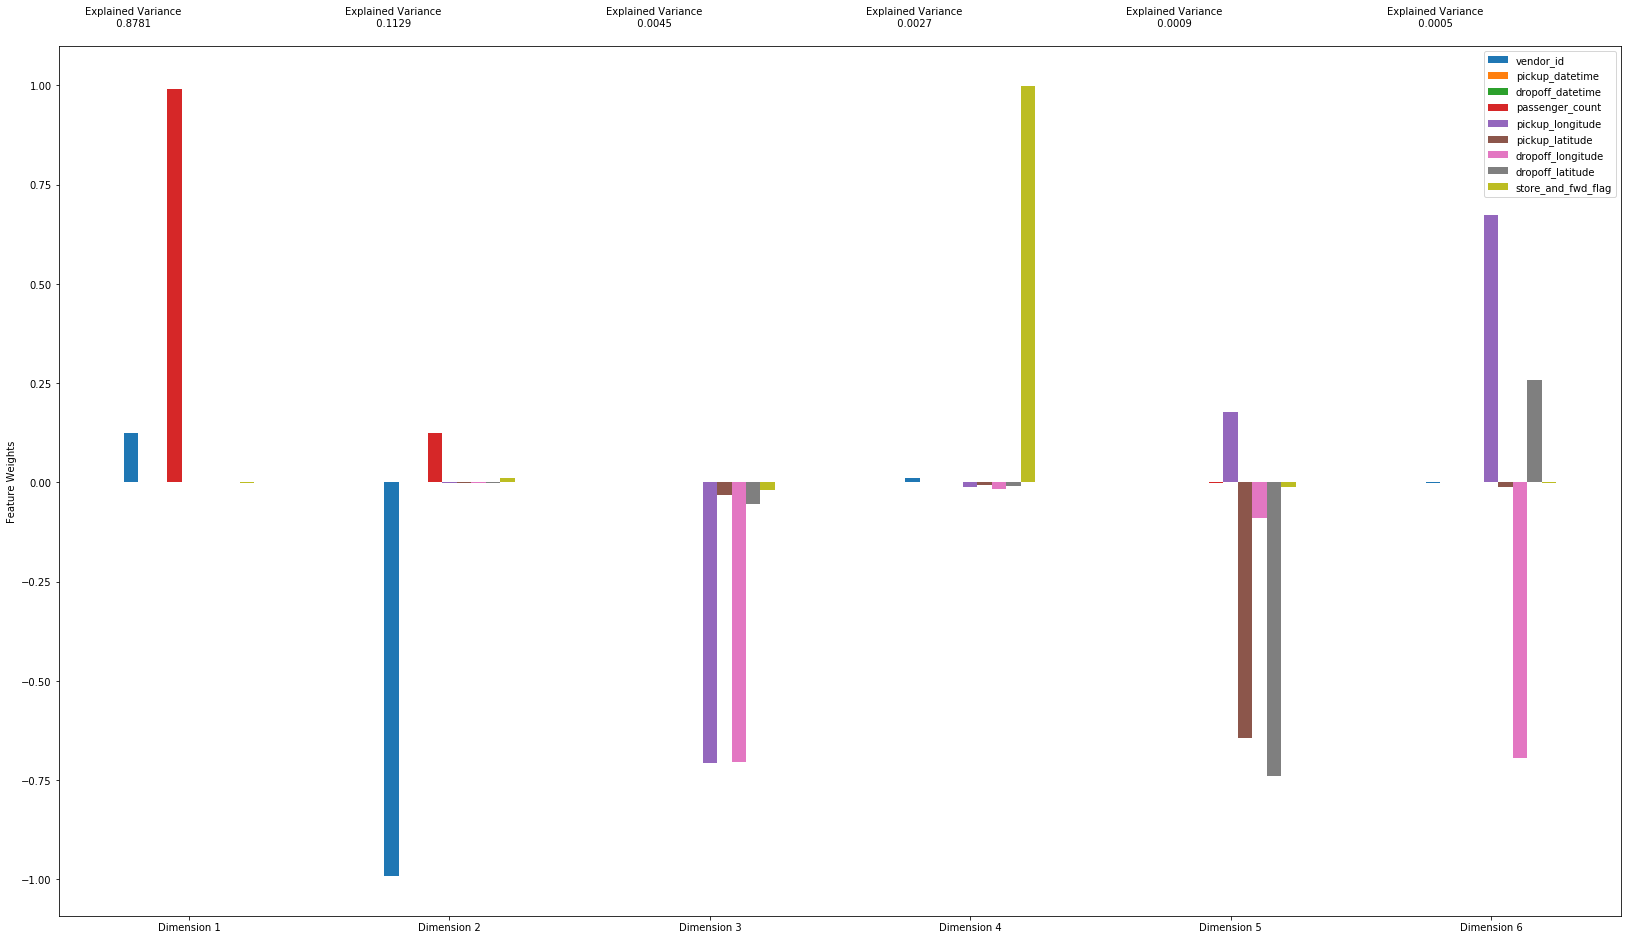

In [15]:
#PCA
pca_comp = 6
from sklearn.decomposition import PCA
pca_bo = PCA(n_components = pca_comp)
reduced_data = pca_bo.fit_transform(training_data)
pca_bo_results = pca_results(training_data, pca_bo)
print('shape of reduced data: ', reduced_data.shape)

In [16]:
%matplotlib inline
def cluster_results(reduced_data, preds, centers):
    '''Visualizes the PCA-reduced cluster data in two dimensionsAdds cues for cluster centers and student-selected sample data'''
    clustered_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2', 'Dimension 3', 
                                                           'Dimension 4', 'Dimension 5','Dimension 6'])
    #, 'Dimension 7', 'Dimension 8', 'Dimension 9', 'Dimension 10'
    predictions = pd.DataFrame(preds, columns = ['Cluster'])
    print('shape of predictions: ', predictions.shape)
    plot_data = pd.concat([predictions, clustered_data], axis = 1)
    # Generate the cluster plot
    fig, ax = plt.subplots(figsize = (14,8))
    # Color map
    cmap = cm.get_cmap('gist_rainbow')
    # Color the points based on assigned cluster
    for i, cluster in plot_data.groupby('Cluster'):   
        cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 3', y = 'Dimension 4',
                     color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);
        # Plot centers with indicators
        for i, c in enumerate(centers):
            ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', 
                       alpha = 1, linewidth = 2, marker = 'o', s=200);
            ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);
            # Set plot title
            ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number")
    return plot_data

number of components:  6
shape of predictions:  (1458644, 1)


,Cluster,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,3,-0.601480,-0.544179,-0.000868,-0.000035,-0.023229,-0.008895
1,0,-0.725930,0.448001,0.024519,-0.011218,0.024439,0.008638
2,3,-0.601475,-0.544146,0.028779,0.001097,0.024602,0.007228
3,3,-0.601474,-0.544096,0.057191,0.001902,0.050507,-0.009169
4,3,-0.601483,-0.544200,-0.003208,-0.000334,-0.049625,0.007033


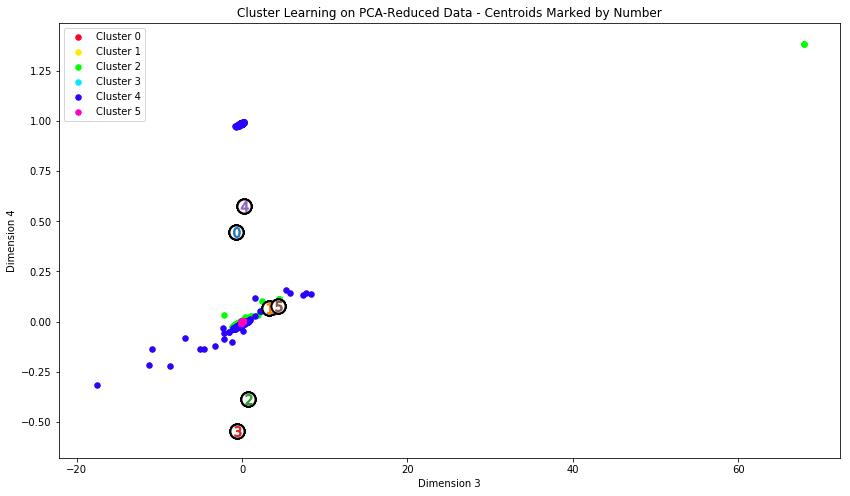

In [17]:
#determine the silhoutte score for diffent number of components
#from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
number_of_components = [6]

for component in number_of_components:
    print('number of components: ', component)
    #clusterer = KMeans(n_clusters=component).fit(reduced_data)
    clusterer = GaussianMixture(n_components = component, covariance_type='full').fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    #centers = clusterer.cluster_centers_
    centers = clusterer.means_
    clustered_data = cluster_results(reduced_data, preds, centers)
    display(clustered_data.head())
#pca did not help!

In [18]:
#Regressor 3- Random forest - took too long
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import cross_val_score
#estimator = RandomForestRegressor(random_state=0, n_estimators=100)
#score = cross_val_score(estimator, training_data, trip_time).mean()
#print('score: ', score)

In [19]:
#from sklearn.ensemble import RandomForestRegressor
#estimators = [50]
#for estimator in estimators:
#    print('estimator: ', estimator)
#    random_forest_regressor = RandomForestRegressor(random_state=0, n_estimators=estimator)
#    print('Score for Random Forest Regressor: ', modelandtest(random_forest_regressor, X_train, X_test, y_train, y_test))

In [20]:
#Regressor 4 - SVR - took way too long
#from sklearn.svm import SVR
#depths_svr = [2,3,4,5]
#for depth in depths_svr:
#    print('max_depth: ',depth)
#    svr_poly = SVR(kernel='poly', C=1e3, degree=depth)
#    print('Score for svr_poly: ', modelandtest(svr_poly, X_train, X_test, y_train, y_test))

In [23]:
#drop dropoff_datetime as the difference between pick up and drop off will be enough to predict the time
training_data.drop(['dropoff_datetime'], axis=1, inplace=True)
from sklearn.cross_validation import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(training_data, trip_time, test_size=0.2, random_state=0)

In [25]:
#Decision tree regressor without drop off time
from sklearn.tree import DecisionTreeRegressor
depths = [1]
for depth in depths:
    print('depth: ', depth)
    decision_tree_regressor = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=35, 
                                                min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                                max_features=None, random_state=None, max_leaf_nodes=None, 
                                                min_impurity_split=1e-07, presort=False)
    print('Score for Decision Tree Regressor: ', modelandtest(decision_tree_regressor, X_train_1, X_test_1, y_train_1, y_test_1))

depth:  1
r2_score:  -0.44166826006
rmsle_score:  0.6070960559169423
Score for Decision Tree Regressor:  None


In [26]:
#Regressor 5 - Stochastic Gradient Descent Regressor
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
             fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
             loss='squared_loss', n_iter=30, penalty='l2', power_t=0.25,
             random_state=None, shuffle=True, verbose=0, warm_start=False)
print('Score for Stochastic Gradient Descent Regressor: ', 
      modelandtest(sgdr, X_train_1, X_test_1, y_train_1, y_test_1))

r2_score:  -88302885087.8
rmsle_score:  12.235193817749433
Score for Stochastic Gradient Descent Regressor:  None


In [27]:
#Regressor 6 - Ridge Regressor
from sklearn.linear_model import Ridge
reg = Ridge(alpha=1.0, fit_intercept=True, normalize=False, 
            copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)
print('Score for Ridge Regressor: ', modelandtest(reg, X_train_1, X_test_1, y_train_1, y_test_1))

r2_score:  0.00139179246652
rmsle_score:  0.9008221960217863
Score for Ridge Regressor:  None


In [28]:
#Regressor 7 - Lasso Regressor
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, 
              max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
print('Score for Lasso Regressor: ', modelandtest(lasso, X_train_1, X_test_1, y_train_1, y_test_1))

r2_score:  0.00126409882191
rmsle_score:  0.8967408093756434
Score for Lasso Regressor:  None


In [29]:
#Regressor 8 - ElasticNet Regressor
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, fit_intercept=True, normalize=False, precompute=False, max_iter=1000, 
                         copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
print('Score for ElasticNet Regressor: ', modelandtest(elastic_net, X_train_1, X_test_1, y_train_1, y_test_1))

r2_score:  0.000129774634065
rmsle_score:  0.8883135454910984
Score for ElasticNet Regressor:  None


In [30]:
#Test the model on test set
#testing_data = pd.read_csv('test.csv')
#display(testing_data.head())
#print('Training data shape: ', training_data.shape)

In [31]:
#Change date and time to float parameters
#testing_data['pickup_datetime'] = [time.mktime(time.strptime(d,time_format)) for d in testing_data['pickup_datetime']]
#display(testing_data.head())

In [32]:
#encode store and fwd flag
#print(testing_data.store_and_fwd_flag.unique())
#testing_data['store_and_fwd_flag'] = np.where(testing_data['store_and_fwd_flag'].str.match('Y'),1,0)
#display(testing_data.head())

In [33]:
#trip_id_test = testing_data['id']
#drop trip_duration and id
#testing_data.drop(['id'], axis=1, inplace=True)
#cab_time_prediction = reg.predict(testing_data)
#print(cab_time_prediction)

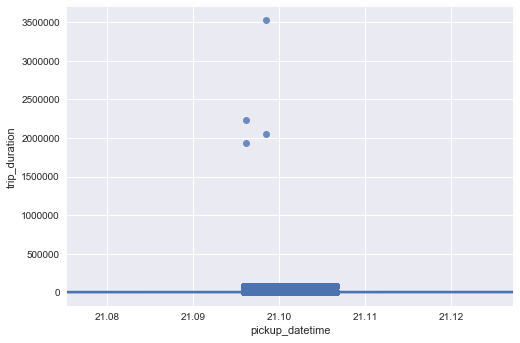

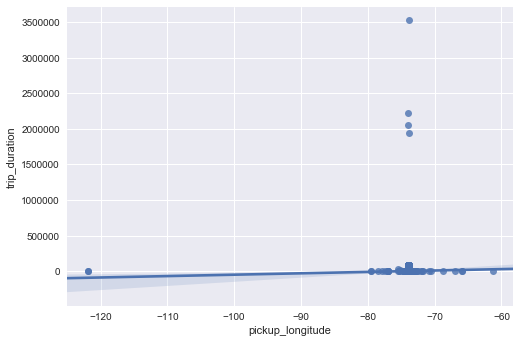

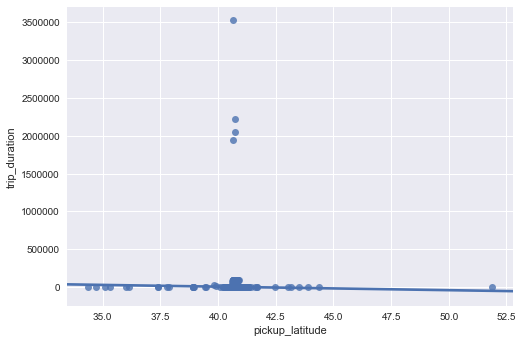

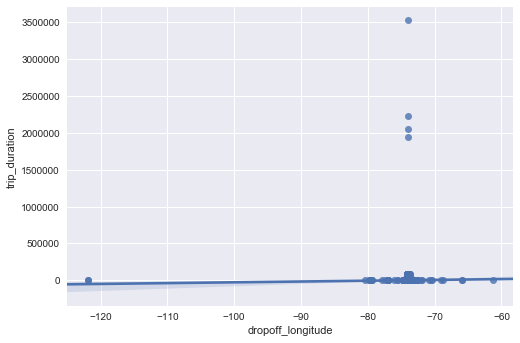

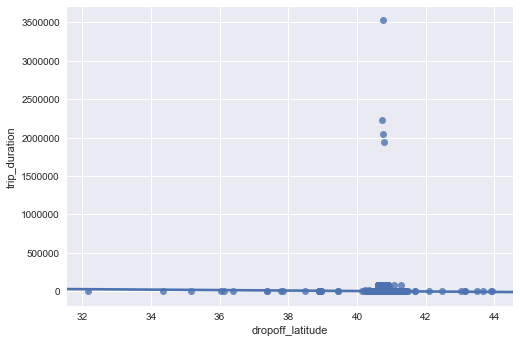

In [34]:
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
for key in training_data:
    if training_data[key].dtypes == 'float64':
        sns.regplot(training_data[key], trip_time)
        plt.show()

In [264]:
#find out the mean, median and standard deviation for available data
import pandas as pd
import numpy as np
training_data_raw = pd.read_csv('train.csv')
print('training data import complete')
#display(training_data_raw.head())
print('Training data shape: ', training_data_raw.shape)
print('Data types for training data')
#display(training_data_raw.dtypes)
print(training_data_raw.store_and_fwd_flag.unique())
training_data_raw['store_and_fwd_flag'] = np.where(training_data_raw['store_and_fwd_flag'].str.match('Y'),1,0)
print('encoded flag')
#display(training_data_raw.head())
#trip_time_raw = training_data_raw['trip_duration']
#display(trip_time_raw.head())
trip_id = training_data_raw['id']
#drop trip_duration and id
training_data_raw.drop(['id', 'dropoff_datetime'], axis=1, inplace=True)
print('removed columns dropoff date time and id')
#display(training_data_raw.head())
import time
time_format = '%Y-%m-%d %H:%M:%S'
training_data_raw['pickup_datetime'] = [math.log(time.mktime(time.strptime(d,time_format))) 
                                    for d in training_data_raw['pickup_datetime']]
training_data_raw['trip_duration'] = [duration_in_seconds/3600.0 for duration_in_seconds in training_data_raw['trip_duration']]
#Add columns for latitude difference and longitude difference
print('adding columns for latitude and longitude difference')
training_data_raw['latitude_difference'] = [dropoff_val-pickup_val for pickup_val, dropoff_val in 
                                            zip(training_data_raw['pickup_latitude'], training_data_raw['dropoff_latitude'])]
training_data_raw['longitude_difference'] = [dropoff_val-pickup_val for pickup_val, dropoff_val in 
                                            zip(training_data_raw['pickup_longitude'], training_data_raw['dropoff_longitude'])]
training_data_raw['displacement'] = [math.sqrt(math.pow(lat_diff,2)+math.pow(long_diff,2)) for lat_diff, long_diff in 
                                            zip(training_data_raw['latitude_difference'], 
                                                training_data_raw['longitude_difference'])]
training_data_raw['speed'] = [dist/timee for dist, timee in zip(training_data_raw['displacement'], 
                                                                training_data_raw['trip_duration'])]
print('converted pickup date time to a log value')
display(training_data_raw.head())

training data import complete
Training data shape:  (1458644, 11)
Data types for training data
['N' 'Y']
encoded flag
removed columns dropoff date time and id
adding columns for latitude and longitude difference
converted pickup date time to a log value


,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,latitude_difference,longitude_difference,displacement
0,2,21.100283,1,-73.982155,40.767937,-73.964630,40.765602,0,0.126389,-0.002335,0.017525,0.017680
1,1,21.105564,1,-73.980415,40.738564,-73.999481,40.731152,0,0.184167,-0.007412,-0.019066,0.020456
2,2,21.097004,1,-73.979027,40.763939,-74.005333,40.710087,0,0.590000,-0.053852,-0.026306,0.059934
3,2,21.101653,1,-74.010040,40.719971,-74.012268,40.706718,0,0.119167,-0.013252,-0.002228,0.013438
4,2,21.100984,1,-73.973053,40.793209,-73.972923,40.782520,0,0.120833,-0.010689,0.000130,0.010690


In [265]:
for key in training_data_raw:
    print(key)
    print('mean:', np.mean(training_data_raw[key].values))
    print('median:', np.median(training_data_raw[key].values))
    print('standard deviation:', np.std(training_data_raw[key].values))
    print('min:', np.min(training_data_raw[key].values))
    print('max:', np.max(training_data_raw[key].values))

vendor_id
mean: 1.53495026888
median: 2.0
standard deviation: 0.498776982934
min: 1
max: 2
pickup_datetime
mean: 21.1013279462
median: 21.1013490459
standard deviation: 0.0030537890541
min: 21.0959044133
max: 21.1066816215
passenger_count
mean: 1.66452952194
median: 1.0
standard deviation: 1.31424171732
min: 0
max: 9
pickup_longitude
mean: -73.9734863049
median: -73.9817428589
standard deviation: 0.0709018341187
min: -121.93334198
max: -61.3355293274
pickup_latitude
mean: 40.7509209084
median: 40.7541007996
standard deviation: 0.0328811749865
min: 34.3596954346
max: 51.8810844421
dropoff_longitude
mean: -73.9734159469
median: -73.9797515869
standard deviation: 0.0706432438818
min: -121.933303833
max: -61.3355293274
dropoff_latitude
mean: 40.7517995149
median: 40.754524231
standard deviation: 0.0358905433029
min: 32.1811408997
max: 43.9210281372
store_and_fwd_flag
mean: 0.00551539649154
median: 0.0
standard deviation: 0.0740606298453
min: 0
max: 1
trip_duration
mean: 0.266525631378
medi

In [266]:
#remove outliers
outlier_array_list = []
for key in training_data_raw:
    if key == 'trip_duration':
        print('Analysis for ', key)
        Q1 = np.percentile(training_data_raw[key], 25)
        print('Q1 ', Q1)
        Q3 = np.percentile(training_data_raw[key], 75)
        print('Q3 ', Q3)
        interquartile_range = Q3-Q1
        step = 4.0*interquartile_range
        print('step ', step)
        print ("Data points considered outliers for the feature :", key)
        display(training_data_raw[~((training_data_raw[key] >= Q1 - step) & (training_data_raw[key] <= Q3 + step))])
        #additional code to eliminate all outliers
        outlier_array = (np.where([~((training_data_raw[key] >= Q1 - step) & (training_data_raw[key] <= Q3 + step))]))
        print(outlier_array[1])
        for outlier in outlier_array[1]:
            outlier_array_list.append(outlier)
        
outliers = list(set(outlier_array_list))
good_data = training_data_raw.drop(training_data_raw.index[outliers]).reset_index(drop = True)
display(training_data_raw.head())
print(good_data.shape)

Analysis for  trip_duration
Q1  0.110277777778
Q3  0.298611111111
step  0.753333333333
Data points considered outliers for the feature : trip_duration


,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,latitude_difference,longitude_difference,displacement
354,2,21.106662,1,-73.781898,40.644772,-73.985893,40.760159,0,1.718611,0.115387,-0.203995,0.234367
403,1,21.100498,1,-73.777184,40.646500,-73.985001,40.760918,0,1.419167,0.114418,-0.207817,0.237233
531,2,21.098886,3,-74.008102,40.741489,-74.009956,40.714611,0,23.498333,-0.026878,-0.001854,0.026942
1057,2,21.104064,1,-73.995583,40.716949,-73.789101,40.642448,0,1.138333,-0.074501,0.206482,0.219511
1113,2,21.105016,1,-73.948578,40.778080,-73.781792,40.646790,0,1.167222,-0.131290,0.166786,0.212261
1134,2,21.103484,1,-73.990242,40.750919,-73.976280,40.750889,0,23.930278,-0.000031,0.013962,0.013962
1160,1,21.105069,3,-73.872971,40.774124,-73.975449,40.765354,0,1.431111,-0.008770,-0.102478,0.102853
1248,1,21.102644,4,-73.781555,40.644749,-73.989708,40.758984,0,1.062778,0.114235,-0.208153,0.237439
1378,2,21.101885,6,-73.903511,40.639160,-73.903107,40.639210,0,1.140833,0.000050,0.000404,0.000407
1395,1,21.100696,1,-73.948822,40.773197,-73.782997,40.643906,0,1.096944,-0.129292,0.165825,0.210272


[    354     403     531 ..., 1458076 1458247 1458600]


,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,latitude_difference,longitude_difference,displacement
0,2,21.100283,1,-73.982155,40.767937,-73.964630,40.765602,0,0.126389,-0.002335,0.017525,0.017680
1,1,21.105564,1,-73.980415,40.738564,-73.999481,40.731152,0,0.184167,-0.007412,-0.019066,0.020456
2,2,21.097004,1,-73.979027,40.763939,-74.005333,40.710087,0,0.590000,-0.053852,-0.026306,0.059934
3,2,21.101653,1,-74.010040,40.719971,-74.012268,40.706718,0,0.119167,-0.013252,-0.002228,0.013438
4,2,21.100984,1,-73.973053,40.793209,-73.972923,40.782520,0,0.120833,-0.010689,0.000130,0.010690


(1448488, 12)


In [267]:
#for key in good_data:
#    if good_data[key].dtypes == 'float64':
#        sns.regplot(good_data[key], good_data['trip_duration'])
#        plt.show()

In [268]:
print(good_data.dtypes)

vendor_id                 int64
pickup_datetime         float64
passenger_count           int64
pickup_longitude        float64
pickup_latitude         float64
dropoff_longitude       float64
dropoff_latitude        float64
store_and_fwd_flag        int32
trip_duration           float64
latitude_difference     float64
longitude_difference    float64
displacement            float64
dtype: object


In [269]:
trip_time_raw = good_data['trip_duration']
display(trip_time_raw.head())
good_data.drop(['trip_duration'], axis=1, inplace=True)
from sklearn.cross_validation import train_test_split
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(good_data, trip_time_raw, 
                                                                    test_size=0.2, random_state=0)

0    0.126389
1    0.184167
2    0.590000
3    0.119167
4    0.120833
Name: trip_duration, dtype: float64

In [298]:
decision_tree_regressor_raw = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=13, 
                                                min_samples_split=2, min_samples_leaf=150, min_weight_fraction_leaf=0.0, 
                                                max_features=None, random_state=None, max_leaf_nodes=10000, 
                                                min_impurity_split=1e-07, presort=False)
print('Score for Decision Tree Regressor: ', modelandtest(decision_tree_regressor_raw, X_train_raw, X_test_raw, y_train_raw, 
                                                          y_test_raw))
'''scores with all columns
r2_score:  0.689184396727
rmsle_score:  0.068117046660109485'''

r2_score:  0.689184396727
rmsle_score:  0.06811704666010948
Score for Decision Tree Regressor:  None


'scores with all columns - 4.0\nr2_score:  0.687424241692\nrmsle_score:  0.0683317931371135'

In [263]:
from sklearn.linear_model import SGDRegressor
sgdr_raw = SGDRegressor(alpha=0.1, average=False, epsilon=0.1, eta0=0.01,
             fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
             loss='squared_loss', n_iter=30, penalty='l2', power_t=0.25,
             random_state=None, shuffle=True, verbose=0, warm_start=False)
print('Score for Stochastic Gradient Descent Regressor: ', modelandtest(sgdr_raw, X_train_raw, X_test_raw, 
                                                                        y_train_raw, y_test_raw))

r2_score:  -3.60716938813e+13
rmsle_score:  11.268496235391215
Score for Stochastic Gradient Descent Regressor:  None


In [276]:
from sklearn.linear_model import Ridge
reg_raw = Ridge(alpha=0.5, fit_intercept=True, normalize=False, 
            copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)
print('Score for Ridge Regressor: ', modelandtest(reg_raw, X_train_raw, X_test_raw, y_train_raw, y_test_raw))

r2_score:  0.503670029166
rmsle_score:  0.11165282208438564
Score for Ridge Regressor:  None


In [272]:
from sklearn.linear_model import Lasso
lasso_raw = Lasso(alpha=0.1, fit_intercept=True, normalize=False, precompute=False, copy_X=True, 
              max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
print('Score for Lasso Regressor: ', modelandtest(lasso_raw, X_train_raw, X_test_raw, y_train_raw, y_test_raw))

r2_score:  -2.69547249032e-06
rmsle_score:  0.12481722310821722
Score for Lasso Regressor:  None


In [278]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_regressor_raw = AdaBoostRegressor(decision_tree_regressor_raw)
print('Score for AdaBoostRegressor: ', modelandtest(adaboost_regressor_raw,  X_train_raw, X_test_raw, y_train_raw, y_test_raw))

r2_score:  0.113013356338
rmsle_score:  0.12269464079771748
Score for AdaBoostRegressor:  None


In [303]:
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gradientBoostingRegressor_raw = GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, 
                                                          subsample=1.0, criterion='friedman_mse', 
                                                          min_samples_split=2, min_samples_leaf=1, 
                                                          min_weight_fraction_leaf=0.0, max_depth=3, 
                                                          min_impurity_split=1e-07, init=None, random_state=None, 
                                                          max_features=None, alpha=0.9, verbose=0, 
                                                          max_leaf_nodes=None, warm_start=False, presort='auto')
print('Score for BaggingRegressor: ', modelandtest(gradientBoostingRegressor_raw,  X_train_raw, 
                                                   X_test_raw, y_train_raw, y_test_raw))

r2_score:  0.54869617447
rmsle_score:  0.08218620751043271
Score for BaggingRegressor:  None


In [305]:
#Bagging Regressor
from sklearn.ensemble import BaggingRegressor
baggingRegressor_raw = BaggingRegressor(base_estimator=decision_tree_regressor_raw, 
                                            n_estimators=100, max_samples=1.0, max_features=1.0, 
                                            bootstrap=True, bootstrap_features=False, oob_score=False, 
                                            warm_start=False, n_jobs=1, random_state=None, verbose=0)
print('Score for BaggingRegressor: ', modelandtest(baggingRegressor_raw,  X_train_raw, X_test_raw, y_train_raw, y_test_raw))
    
'''n_estimators = 60 r2_score:  0.700074798644
rmsle_score:  0.06682454385520283'''

r2_score:  0.70016486215
rmsle_score:  0.0668144043032565
Score for BaggingRegressor:  None


'n_estimators = 60 r2_score:  0.700074798644\nrmsle_score:  0.06682454385520283'

In [306]:
#Test the model on test set
testing_data = pd.read_csv('test.csv')
display(testing_data.head())
print('Training data shape: ', testing_data.shape)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


Training data shape:  (625134, 9)


In [308]:
#Repeat the data transformations done on the training set
trip_id_test = testing_data['id']
#drop trip_duration and id
testing_data.drop(['id'], axis=1, inplace=True)
print('removed columns dropoff date time and id')
testing_data['pickup_datetime'] = [math.log(time.mktime(time.strptime(d,time_format))) 
                                    for d in testing_data['pickup_datetime']]
#training_data_raw['trip_duration'] = [duration_in_seconds/3600.0 for duration_in_seconds in training_data_raw['trip_duration']]
#Add columns for latitude difference and longitude difference
print('adding columns for latitude and longitude difference')
testing_data['latitude_difference'] = [dropoff_val-pickup_val for pickup_val, dropoff_val in 
                                            zip(testing_data['pickup_latitude'], testing_data['dropoff_latitude'])]
testing_data['longitude_difference'] = [dropoff_val-pickup_val for pickup_val, dropoff_val in 
                                            zip(testing_data['pickup_longitude'], testing_data['dropoff_longitude'])]
testing_data['displacement'] = [math.sqrt(math.pow(lat_diff,2)+math.pow(long_diff,2)) for lat_diff, long_diff in 
                                            zip(testing_data['latitude_difference'], 
                                                testing_data['longitude_difference'])]
display(testing_data.head())
print('Training data shape: ', testing_data.shape)

removed columns dropoff date time and id
adding columns for latitude and longitude difference


,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,latitude_difference,longitude_difference,displacement
0,1,21.106682,1,-73.988129,40.732029,-73.990173,40.756680,N,0.024651,-0.002045,0.024735
1,1,21.106682,1,-73.964203,40.679993,-73.959808,40.655403,N,-0.024590,0.004395,0.024979
2,1,21.106682,1,-73.997437,40.737583,-73.986160,40.729523,N,-0.008060,0.011276,0.013861
3,2,21.106682,1,-73.956070,40.771900,-73.986427,40.730469,N,-0.041431,-0.030357,0.051363
4,1,21.106682,1,-73.970215,40.761475,-73.961510,40.755890,N,-0.005585,0.008705,0.010343


Training data shape:  (625134, 11)


In [309]:
#Oops forgot to encode the flag
testing_data['store_and_fwd_flag'] = np.where(testing_data['store_and_fwd_flag'].str.match('Y'),1,0)
display(testing_data.head())
print('Training data shape: ', testing_data.shape)

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,latitude_difference,longitude_difference,displacement
0,1,21.106682,1,-73.988129,40.732029,-73.990173,40.756680,0,0.024651,-0.002045,0.024735
1,1,21.106682,1,-73.964203,40.679993,-73.959808,40.655403,0,-0.024590,0.004395,0.024979
2,1,21.106682,1,-73.997437,40.737583,-73.986160,40.729523,0,-0.008060,0.011276,0.013861
3,2,21.106682,1,-73.956070,40.771900,-73.986427,40.730469,0,-0.041431,-0.030357,0.051363
4,1,21.106682,1,-73.970215,40.761475,-73.961510,40.755890,0,-0.005585,0.008705,0.010343


Training data shape:  (625134, 11)


In [319]:
#fit the regressor and predict the test data
baggingRegressor_raw = BaggingRegressor(base_estimator=decision_tree_regressor_raw, 
                                            n_estimators=100, max_samples=1.0, max_features=1.0, 
                                            bootstrap=True, bootstrap_features=False, oob_score=False, 
                                            warm_start=False, n_jobs=1, random_state=None, verbose=0)
X_train_model = good_data
y_train_model = trip_time_raw
baggingRegressor_raw.fit(X_train_model, y_train_model)
y_predict = baggingRegressor_raw.predict(testing_data)
test_results = [val*3600.0 for val in y_predict]
print(test_results)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [323]:
#Create a dataframe
test_results = np.array(test_results, dtype=int)
result_export = pd.DataFrame({'id':trip_id_test, 'trip_duration':test_results})
display(result_export.head())
print(result_export.shape)

,id,trip_duration
0,id3004672,994
1,id3505355,665
2,id1217141,538
3,id2150126,1323
4,id1598245,424


(625134, 2)


In [322]:
result_export.to_csv('results.csv', index=False)
print('results exported successfully')

results exported successfully


In [324]:
import sys
print(sys.version)
print(sys.version_info)

3.6.1 (v3.6.1:69c0db5, Mar 21 2017, 18:41:36) [MSC v.1900 64 bit (AMD64)]
sys.version_info(major=3, minor=6, micro=1, releaselevel='final', serial=0)


In [331]:
#Trying results on MLPRegressor
from sklearn.neural_network import MLPRegressor
mlpr = MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', 
                    learning_rate='constant', learning_rate_init=0.0001, power_t=0.5, max_iter=200, shuffle=True, 
                    random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                    nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.5, 
                    beta_2=0.999, epsilon=1e-08)
print('Score for mlp regressor: ', modelandtest(mlpr,  X_train_raw, X_test_raw, y_train_raw, y_test_raw))

r2_score:  0.606513360757
rmsle_score:  0.14147972284212565
Score for mlp regressor:  None


In [339]:
import seaborn
print(seaborn.__version__)

0.7.1
